# Results 2a: Data Quality

In [1]:
import os
import numpy as np
from pandas import read_csv

## Section 1: Load and prepare data

In [2]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Load and prepare data.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Load data.
scores = read_csv(os.path.join('data', 'scores.csv'))

## Restrict participants.
metrics = read_csv(os.path.join('data', 'metrics.csv'))
scores = scores[scores.subject.isin(metrics.subject)].reset_index(drop=True)

## Merge DataFrames.
data = scores.merge(metrics[['platform','subject','infreq']])

## Re-format infrequency.
data['infreq'] = np.where(data['infreq'] > 0, 1, 0)

## Section 2: Visualization

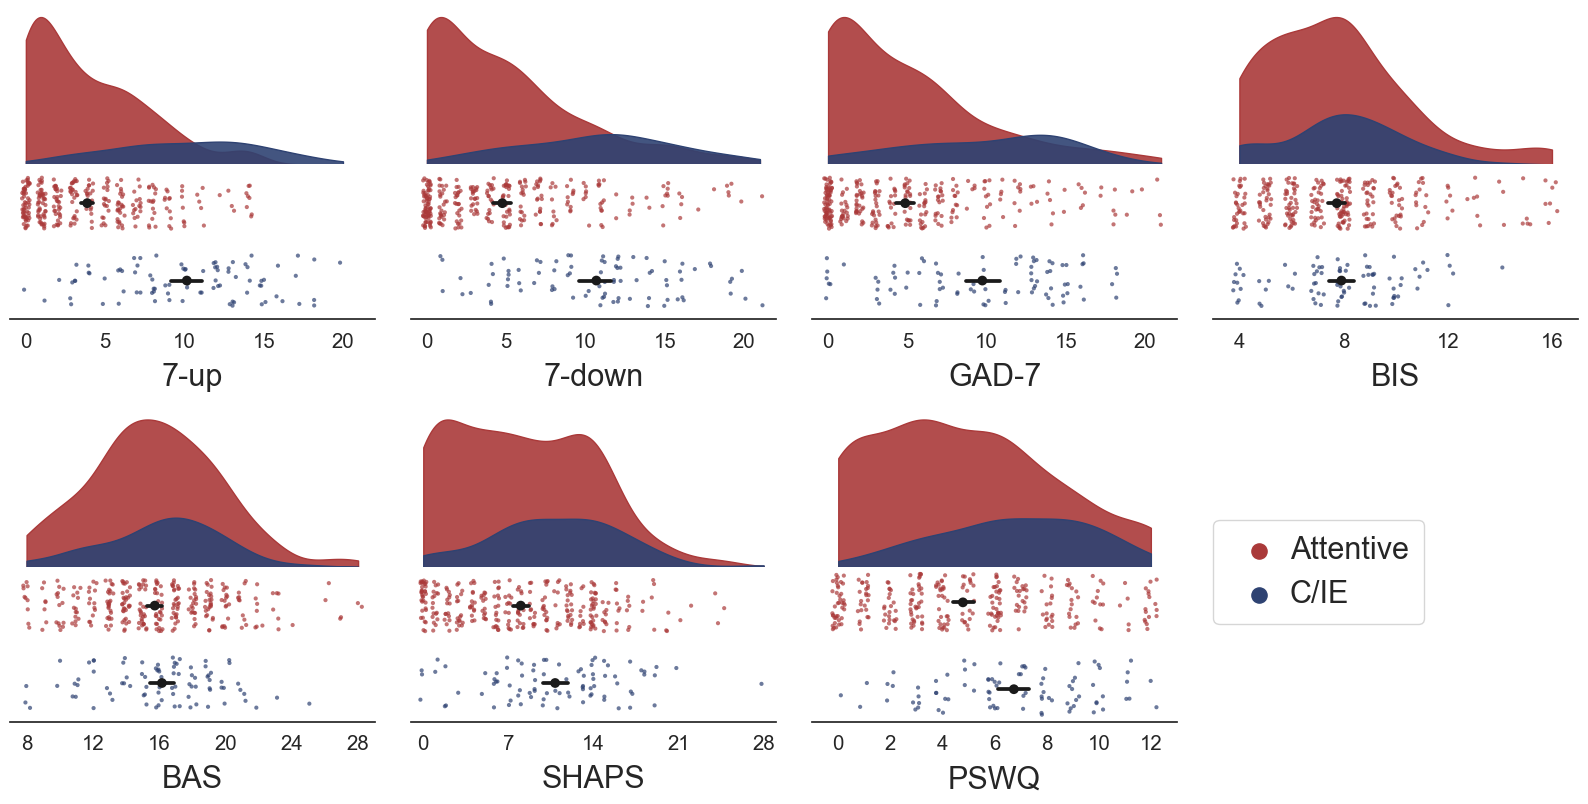

In [3]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set_theme('notebook', style='white', font='sans-serif', font_scale=1.33)
%matplotlib inline

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define canvas.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize canvas.
fig = plt.figure(figsize=(16,8))
                         
## Initialize grid.
gs = fig.add_gridspec(nrows=2, ncols=4, left=0.01, right=0.99, top=0.99, bottom=0.10, wspace=0.1, hspace=0.3)

## Initialize panels.
panels = []
for i in range(8): panels.append( gs[i//4,i%4].subgridspec(nrows=2, ncols=1, wspace=0, hspace=0) )
    
## Define order.
order = ['7u','7d','gad7','bis','bas','shaps','pswq']

## Define titles.
titles = ['7-up', '7-down', 'GAD-7', 'BIS', 'BAS', 'SHAPS', 'PSWQ']

## Define axis limits.
xlims = [(-1,22),(-1,22),(-1,22),(3,17),(7,29),(-1,29),(-1,13)]
xticks = [np.arange(0,21,5),np.arange(0,21,5),np.arange(0,21,5),np.arange(4,17,4),
          np.arange(8,29,4),np.arange(0,29,7),np.arange(0,13,2)]

## Define aesthetic features.
palette = ['#AA3939','#2E4272']
labelpad = 8

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Main loop.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
np.random.seed(47404)

for i, survey in enumerate(order):   
    
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    ### Distribution plots.
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    
    ## Initialize axis.
    ax = plt.subplot(panels[i][0])
    
    ## Plot distribution of scores.
    sns.kdeplot(x=survey, hue='infreq', data=data, hue_order=[1,0], common_grid=True, legend=False,
                palette=palette[::-1], fill=True, cut=0, alpha=0.9, ax=ax)
    
    ## Add details.
    ax.set(xlim=xlims[i], xticks=[], xlabel='', yticks=[], ylabel='')
    sns.despine(left=True, right=True, top=True, bottom=True, ax=ax)
            
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    ### Point plots.
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    
    ## Initialize axis.
    ax = plt.subplot(panels[i][1])
        
    ## Plot central tendency.
    sns.pointplot(y='infreq', x=survey, data=data, order=[0,1], orient='h', color='k',
                  markers='o', scale=0.8, join=False, ci=95, edgecolor='k', zorder=10, ax=ax)
    
    ## Add small jitter to scores.
    data['jitter'] = data[survey] + np.random.uniform(-0.25,0.25,data[survey].size)
        
    ## Plot individual scores.
    sns.stripplot(y='infreq', x='jitter', data=data, order=[0,1], orient='h', palette=palette,
                   size=3, alpha=0.7, jitter=0.33, zorder=-1, ax=ax)
    
    ## Add details.
    ax.set(xlim=xlims[i], xticks=xticks[i], yticks=[], ylabel='')
    ax.set_xlabel(titles[i], fontsize=22, labelpad=labelpad)
    sns.despine(left=True, ax=ax)

## Add legend.
ax.scatter([], [], s=120, color=palette[0], label='Attentive')
ax.scatter([], [], s=120, color=palette[1], label='C/IE')
ax.legend(loc=1, bbox_to_anchor=(1.72, 1.4), frameon=True, fontsize=22, borderpad=0.5, handletextpad=0)
    
## Save figure.
plt.savefig(os.path.join('figures', 'main_02a.pdf'), dpi=180, transparent=True)